In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-continent/Categorical.csv


# Import the reevant libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
raw_data = pd.read_csv('/kaggle/input/country-continent/Categorical.csv')
raw_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [5]:
raw_data.head()

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe


In [7]:
raw_data.describe()

,Longitude,Latitude
count,241.000000,241.000000
mean,14.215380,17.169377
std,72.013654,26.554014
min,-177.348348,-80.508579
25%,-36.433184,1.358761
50%,18.644925,17.277500
75%,47.587005,39.115541
max,171.484924,74.710513


# remove the duplicate index column from the dataset

In [15]:
data = raw_data.copy()
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


# Map the data

In [16]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7})
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


# Select the features

In [18]:
x = data_mapped.iloc[:, 3:4]

In [19]:
x

,continent
0,0
1,2
2,3
3,0
4,1
...,...
236,5
237,2
238,3
239,3


# Clustering

In [20]:
kmeans = KMeans(4)
kmeans.fit(x)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

# Clustering results

In [21]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 3, 2, 2, 2, 2, 1, 3, 1, 0, 0, 0, 0, 2, 0, 2, 1, 3, 2, 3, 3,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 3, 3, 2, 3, 1, 3, 3,
       3, 3, 0, 3, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3,
       2, 2, 3, 2, 0, 3, 2, 2, 0, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       0, 3, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 3, 3, 2, 2, 1, 3, 2, 2, 2,
       1, 2, 3, 2, 2, 3, 0, 2, 0, 2, 3, 2, 1, 2, 1, 0, 3, 3, 2, 0, 3, 1,
       3, 0, 3, 0, 3, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 3, 1, 0, 0, 2, 2,
       1, 2, 3, 1, 0, 1, 2, 2, 3, 3, 1, 3, 3, 3, 1, 0, 0, 0, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 0, 1, 2, 3, 3, 1, 1, 1, 1, 0, 2, 3,
       1, 1, 3, 3, 2, 3, 2, 1, 2, 2, 3, 2, 2, 1, 0, 0, 0, 1, 3, 3, 3],
      dtype=int32)

In [22]:
data_with_clusters = data_mapped.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,2,1
2,Angola,17.537368,-12.293361,3,3
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,1,2
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,0
237,Yemen,47.586762,15.909280,2,1
238,South Africa,25.083901,-29.000341,3,3
239,Zambia,27.774759,-13.458242,3,3


# Plot the data

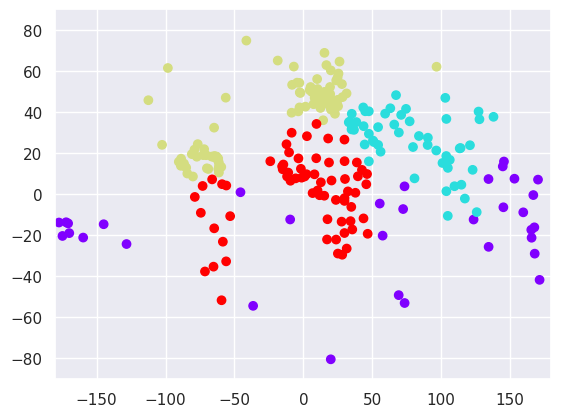

In [23]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()